In [ ]:
import numpy as np                                    # linear algebra
import pandas as pd                                   # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split   #use to train the data model
from sklearn.ensemble import RandomForestRegressor     #uses algorithm for prediction
from sklearn import metrics                            #useful for finding the performance of model such as accuracy score , error score

* *Importing Libraries*  

In [ ]:
# Getting data from the dataset
iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
#Head data (5 only cannot show all)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#Information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Checking the shape of given Dataset
iris.shape

(150, 5)

* *This means there are 150 Rows & 5 Columns in the given Dataset*


---



In [ ]:
#Check which columns are there in the Dataset
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
#This will count The value of Varieties
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [ ]:
#Lets check if there are any "null" values in the Dataset
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

* *This concludes that there are none "null" values in Dataset*


---



In [ ]:
#Let's get some statistical data like percentile, mean and std, min
iris.describe() 

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#We can show separate columns with -->
iris.variety  
#or 
iris['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='sepal.length', ylabel='sepal.width'>

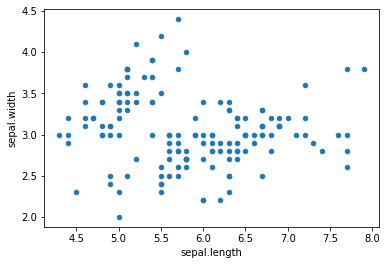

In [ ]:
#A scatter plot is a visual representation of how two variables relate to each other.
iris.plot(kind ='scatter', x='sepal.length', y='sepal.width')

---
# Data Visualization
* *After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a "iris" setosa (in blue) is distinctly different from those of the other two species.*
* *There is some overlap in the pairwise relationships of the other two species, "iris" versicolor (in orange) and "iris" virginica (in green).*


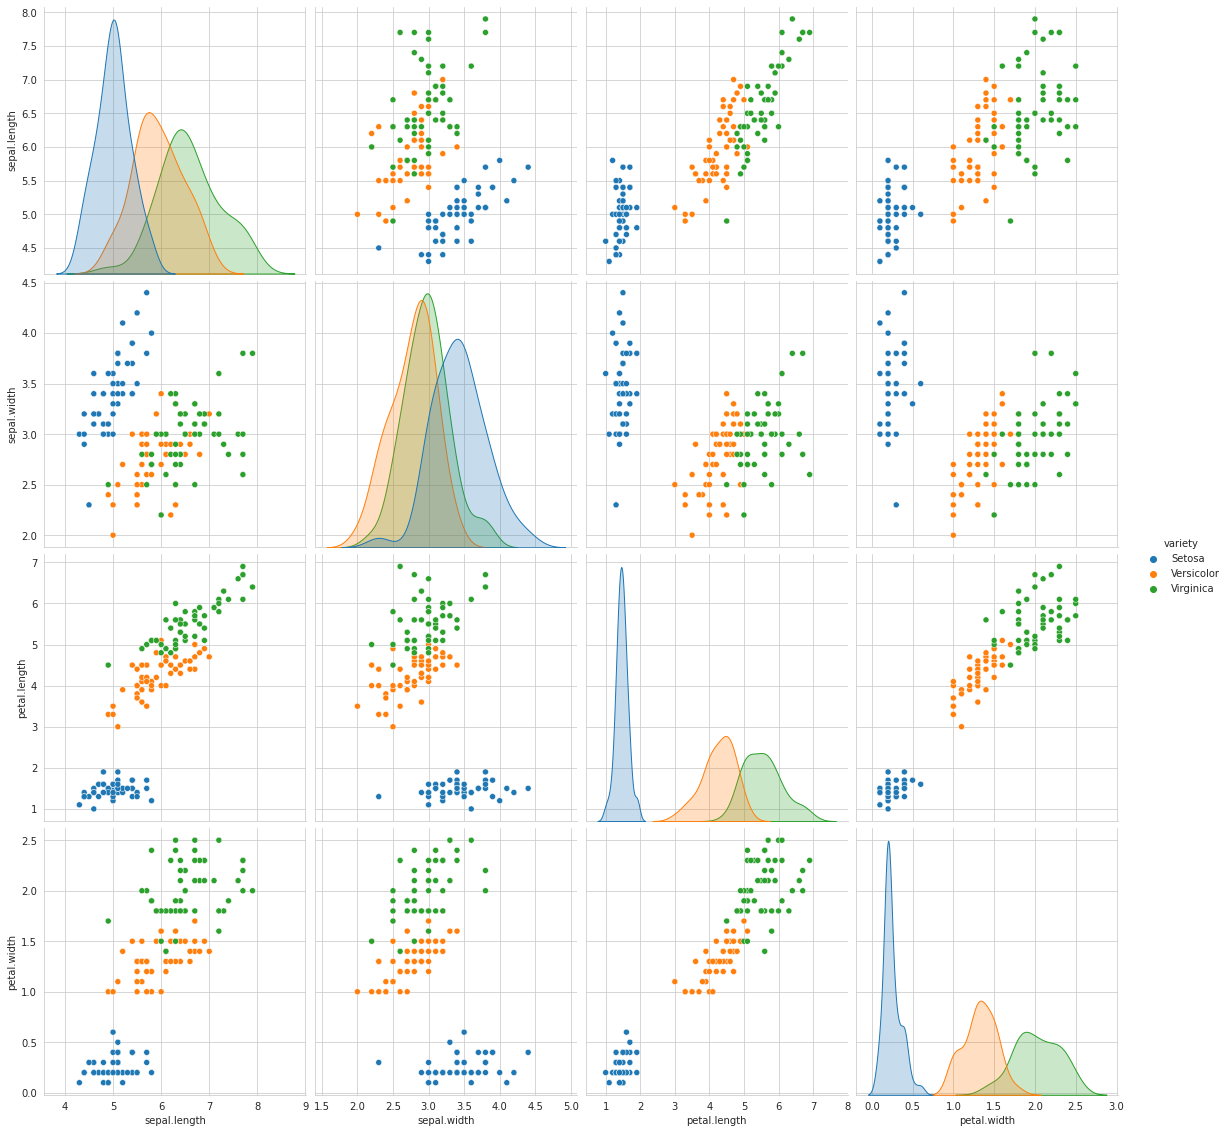

In [ ]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris,hue='variety',height=4);
plt.show()

In [ ]:
#correlation <-- Dataset
correlation = iris.corr()
correlation

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

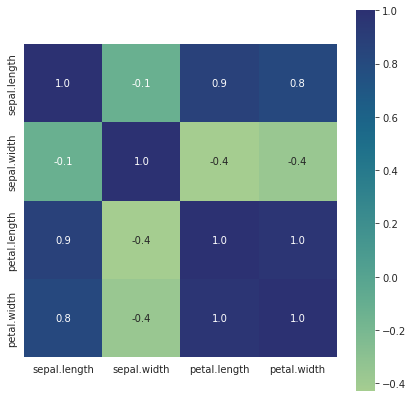

In [ ]:
# Constructing a heat map to understand the correlation
plt.figure(figsize = (7,7))
sns.heatmap(correlation, cbar = True, square = True,  fmt = '.1f', annot = True, annot_kws={'size':10},cmap = 'crest')

---
* **Define x and y**


In [ ]:
#defining x & y
#x contains all the input variables such as independent features
x=iris.iloc[:,:4]
#y should contain the dependent variable which is dependent on independent variables
y=iris.iloc[:,4]

In [ ]:
#view x
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#view y
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

---
# *Split the Data Into Train and Test Datasets*

In [ ]:
#Import train_test_split to split the data into train and test datasets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
#shape of x_train
x_train.shape

(112, 4)

In [ ]:
#shape of x_test
x_test.shape

(38, 4)

In [ ]:
#shape of y_train
y_train.shape

(112,)

In [ ]:
#shape of y_test
y_test.shape

(38,)



---


# Create the Model

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
#train the model using the fit method
#x_train and y_train are the training datasets
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Prediction
y_pred=model.predict(x_test)

In [ ]:
#prediction Results
y_pred

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica'], dtype=object)

---
* The accuracy score tells us how accurately the model we build will predict and the confusion matrix has a matrix with Actual values and predicted values. 
* For that, import accuracy_score and confusion_matrix from the sci-kit learn metric library.

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
#Accuracy 
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.37


# We can see that accuracy of the model is 97.37 percent which is very accurate.


---

